# Aplicação de Pré-processamento dos dados

#### Importação das Bibliotecas

In [5]:
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#### Carregamento do Dataset

In [2]:
customers = pd.read_csv('Mall_Customers.csv')

#### Verificação do Dataset

In [3]:
customers.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
115,116,Female,19,65,50
7,8,Female,23,18,94
162,163,Male,19,81,5
55,56,Male,47,43,41
101,102,Female,49,62,48


   * Customer ID = Identificação única de um cliente
   * Gender = Gênero do cliente
   * Age = Idade do consumidor
   * Annual Income = Renda anual do cliente
   * Spending Score = Pontuação atribuida pelo shopping com base no comportamento do cliente e na natureza do gastos

#### Informação do Dataset

In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<AxesSubplot:>

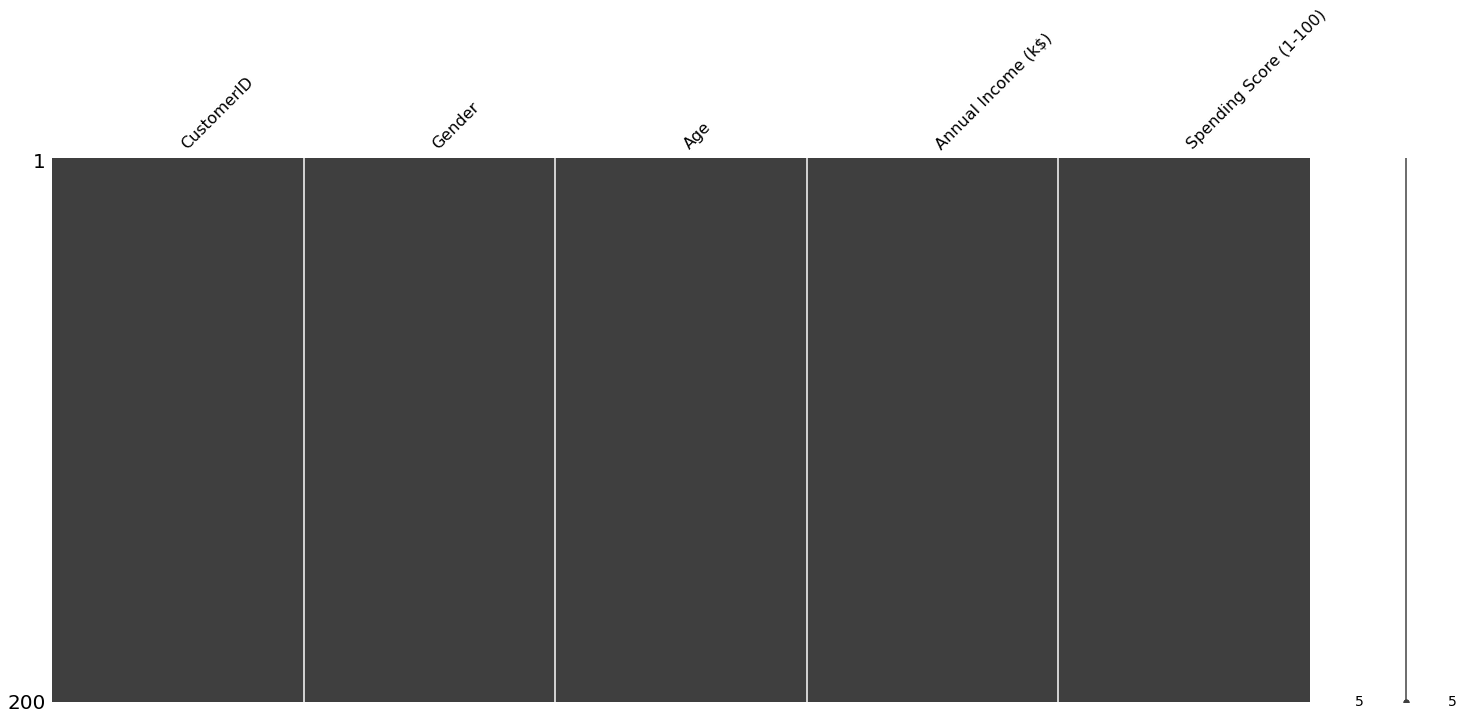

In [6]:
msno.matrix(customers)

 * Não possuimos valores nulos

#### Adicionando valores nulos

In [7]:
customers_null = customers
for col in customers_null.columns:
    customers_null.loc[customers_null.sample(frac=0.1).index, col] = np.nan

<AxesSubplot:>

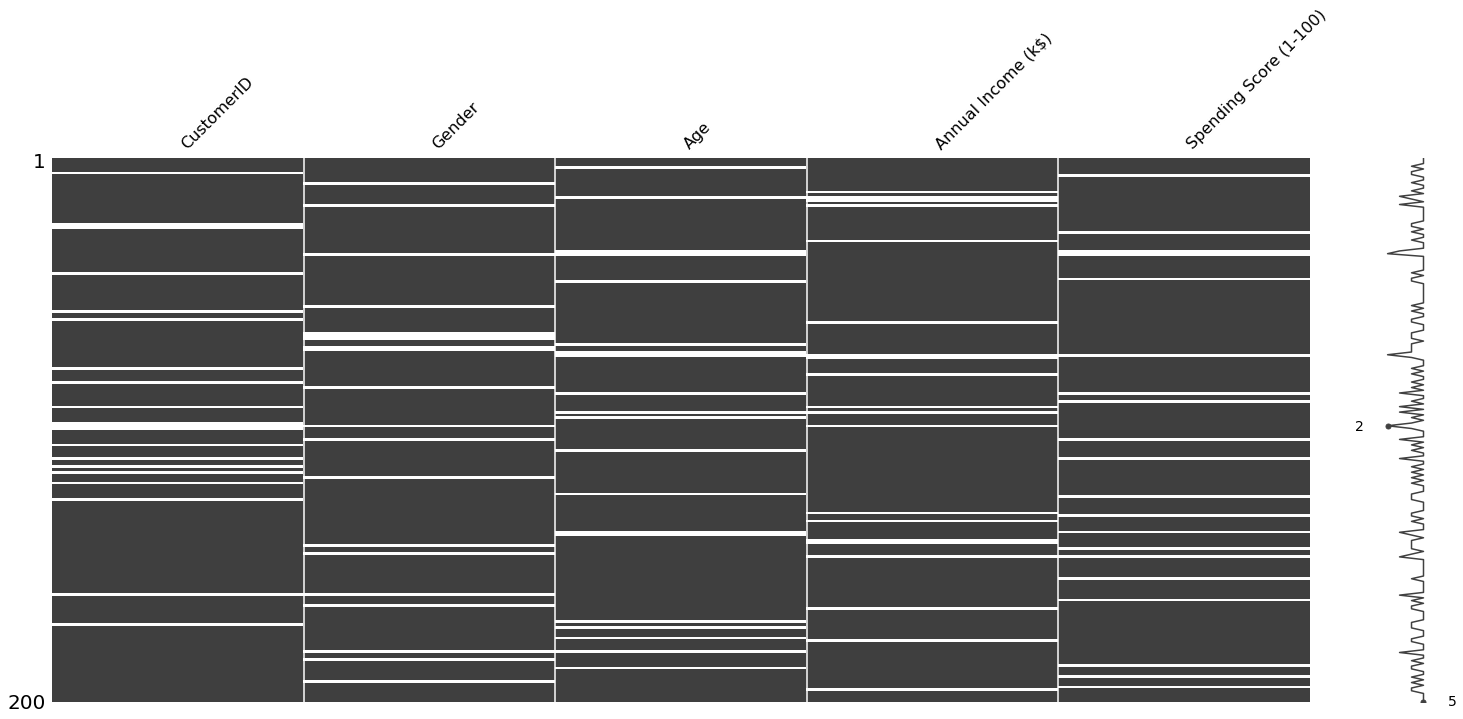

In [8]:
msno.matrix(customers_null)

In [10]:
customers_null.isnull().sum()

CustomerID                20
Gender                    20
Age                       20
Annual Income (k$)        20
Spending Score (1-100)    20
dtype: int64

#### Deletando as linhas que possuem algum valor nulo


In [13]:
customers_null.dropna(inplace=True)

<AxesSubplot:>

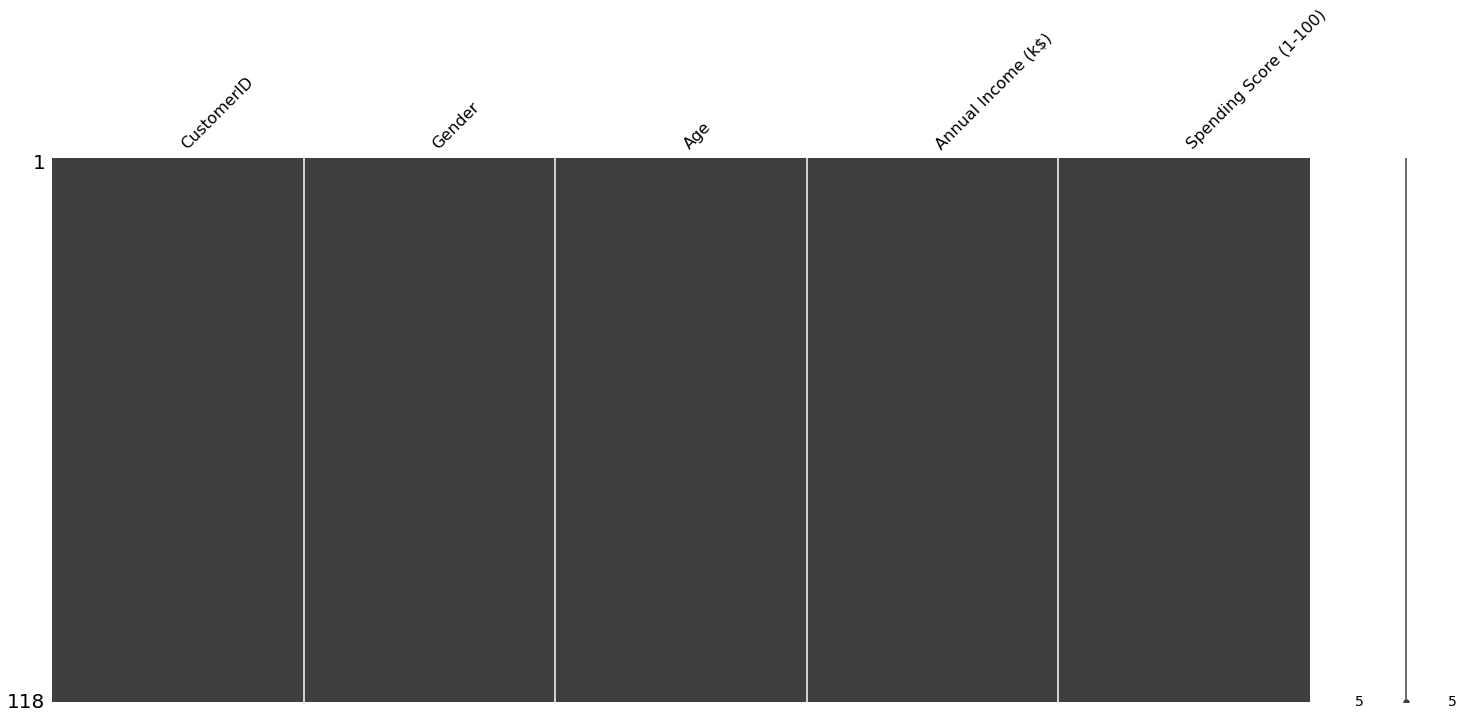

In [14]:
msno.matrix(customers_null)

#### Corrigindo de outras formas

In [22]:
customers2 = customers.copy()
for col in customers2.columns:
    customers2.loc[customers2.sample(frac=0.1).index, col] = np.nan

In [23]:
customers2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              106 non-null    float64
 1   Gender                  106 non-null    object 
 2   Age                     106 non-null    float64
 3   Annual Income (k$)      106 non-null    float64
 4   Spending Score (1-100)  106 non-null    float64
dtypes: float64(4), object(1)
memory usage: 10.5+ KB


##### Preenchendo com 0 

In [26]:
customers2 = customers2.fillna(0)

<AxesSubplot:>

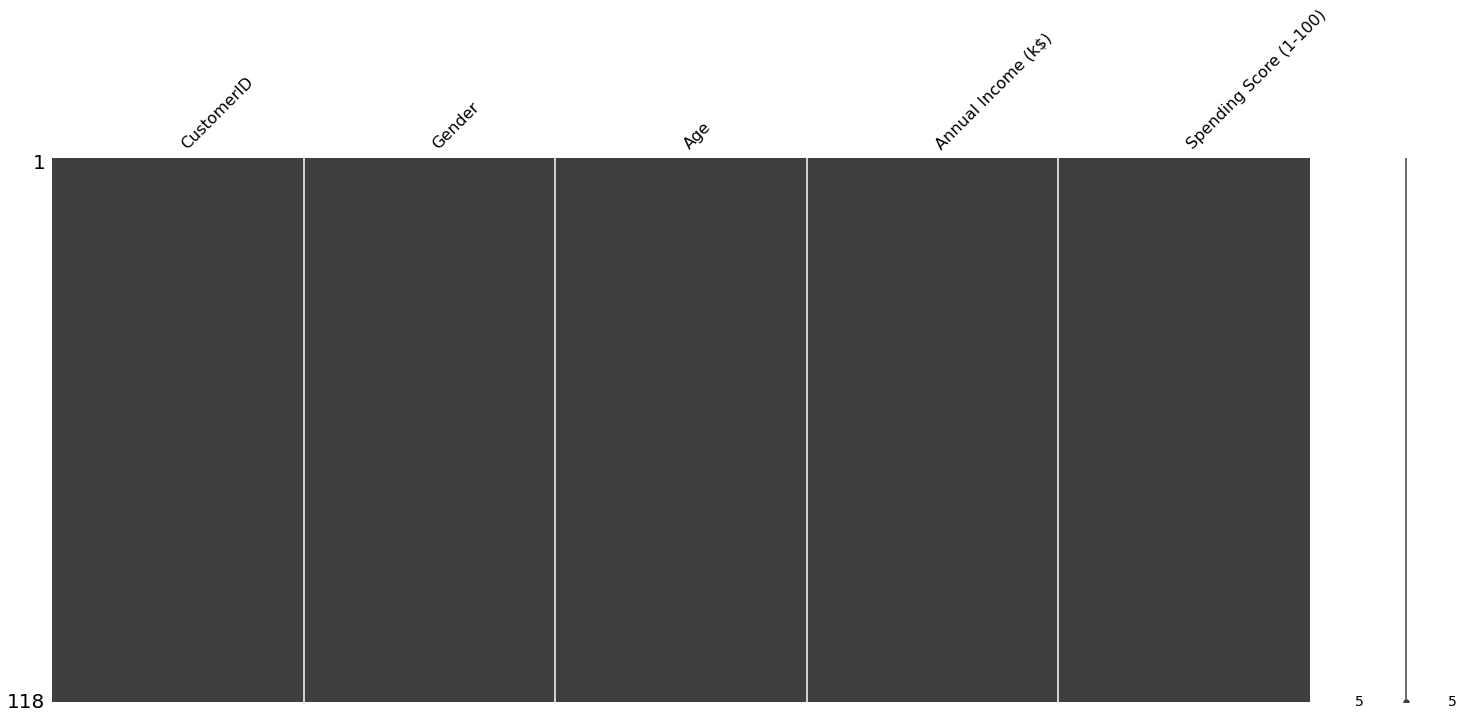

In [27]:
msno.matrix(customers2)

##### Preenchendo com a média

In [28]:
customers3 = customers.copy()
for col in customers3.columns:
    customers3.loc[customers3.sample(frac=0.1).index, col] = np.nan

In [29]:
customers3 = customers3.fillna(customers3.mean())

#### Verificando anomalias no dataset

##### Utilizando o Boxplot

<AxesSubplot:>

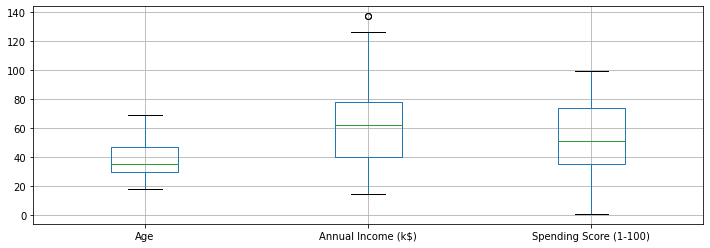

In [30]:
plt.figure(figsize=(12,4))
customers.boxplot(column=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

##### Utilizando o Z-Score

In [31]:
z = np.abs(stats.zscore(customers['Annual Income (k$)'].values))
threshold = 2
result = np.where(z > threshold)

df_salario_outlier = customers.iloc[result[0]]

In [32]:
df_salario_outlier

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
196,197.0,Female,45.0,126.0,28.0
197,198.0,Male,32.0,126.0,74.0
198,199.0,Male,32.0,137.0,18.0
199,200.0,Male,30.0,137.0,83.0


#### Explorando os dados

Text(0.5, 1.0, 'Distruibuição dos clientes quanto ao gênero')

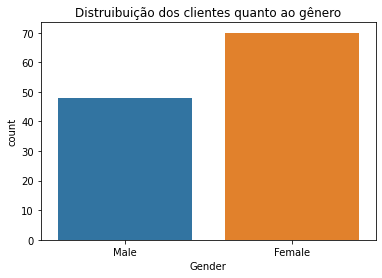

In [33]:
sns.countplot(x='Gender',data=customers)
plt.title('Distruibuição dos clientes quanto ao gênero')

#### Aplicando a codificação aos dados

In [34]:
cat_df_customers = customers.select_dtypes(include=['object']) # copiando as colunas que são do tipo categoricas

In [36]:
cat_df_customers.sample(5)

,Gender
128,Male
29,Female
18,Male
4,Female
83,Female


In [48]:
customers.loc[customers.Gender == 'Male','Gender'] =0
customers.loc[customers.Gender == 'Female','Gender'] =1

In [49]:
customers['Gender'].astype('category').inplace=True

In [50]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              118 non-null    float64
 1   Gender                  118 non-null    object 
 2   Age                     118 non-null    float64
 3   Annual Income (k$)      118 non-null    float64
 4   Spending Score (1-100)  118 non-null    float64
dtypes: float64(4), object(1)
memory usage: 10.5+ KB


#### Aplicando o Label Encodering

In [51]:
le = LabelEncoder()

In [52]:
customers['Gender'] = le.fit_transform(customers['Gender'])
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0,19.0,15.0,39.0
1,2.0,0,21.0,15.0,81.0
2,3.0,1,20.0,16.0,6.0
4,5.0,1,31.0,17.0,40.0
7,8.0,1,23.0,18.0,94.0


#### One hot Enconding

In [58]:
customers_one_hot = pd.read_csv('Mall_Customers.csv')
customers_one_hot = pd.get_dummies(customers_one_hot)
customers_one_hot.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


In [60]:
ohe = OneHotEncoder()
customers_one_hot=customers

In [61]:
customers_ohe = ohe.fit_transform(customers_one_hot['Gender'].values.reshape(-1,1)).toarray()
customers_ohe.shape

(118, 2)

In [62]:
customers_ohe

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.